# Loop 43 LB Feedback Analysis

**Pure GP Model Submission Results:**
- CV: 0.0145
- LB: 0.1147
- Gap: -0.1001

**Key Question:** Does Pure GP have a different CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},  # Pure GP
]

df = pd.DataFrame(submissions)
print('All submissions:')
print(df.to_string(index=False))

All submissions:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147


In [2]:
# Calculate CV-LB relationship for ALL submissions
cv_all = df['cv'].values
lb_all = df['lb'].values

slope_all, intercept_all, r_all, p_all, se_all = stats.linregress(cv_all, lb_all)
print(f'\n=== CV-LB Relationship (ALL submissions) ===')
print(f'LB = {slope_all:.2f} × CV + {intercept_all:.4f}')
print(f'R² = {r_all**2:.4f}')
print(f'Intercept: {intercept_all:.4f}')
print(f'Target: 0.0347')
print(f'Intercept vs Target: {intercept_all/0.0347:.2f}x')


=== CV-LB Relationship (ALL submissions) ===
LB = 4.23 × CV + 0.0533
R² = 0.9807
Intercept: 0.0533
Target: 0.0347
Intercept vs Target: 1.54x


In [3]:
# Calculate CV-LB relationship EXCLUDING Pure GP
df_no_gp = df[df['exp'] != 'exp_042']
cv_no_gp = df_no_gp['cv'].values
lb_no_gp = df_no_gp['lb'].values

slope_no_gp, intercept_no_gp, r_no_gp, p_no_gp, se_no_gp = stats.linregress(cv_no_gp, lb_no_gp)
print(f'\n=== CV-LB Relationship (EXCLUDING Pure GP) ===')
print(f'LB = {slope_no_gp:.2f} × CV + {intercept_no_gp:.4f}')
print(f'R² = {r_no_gp**2:.4f}')
print(f'Intercept: {intercept_no_gp:.4f}')
print(f'Target: 0.0347')
print(f'Intercept vs Target: {intercept_no_gp/0.0347:.2f}x')


=== CV-LB Relationship (EXCLUDING Pure GP) ===
LB = 4.22 × CV + 0.0534
R² = 0.9550
Intercept: 0.0534
Target: 0.0347
Intercept vs Target: 1.54x


In [4]:
# Check if Pure GP is ON or OFF the line
pure_gp_cv = 0.0145
pure_gp_lb = 0.1147

# Predicted LB using the relationship WITHOUT Pure GP
predicted_lb = slope_no_gp * pure_gp_cv + intercept_no_gp

print(f'\n=== Pure GP Analysis ===')
print(f'Pure GP CV: {pure_gp_cv:.4f}')
print(f'Pure GP Actual LB: {pure_gp_lb:.4f}')
print(f'Predicted LB (using non-GP relationship): {predicted_lb:.4f}')
print(f'Difference: {pure_gp_lb - predicted_lb:.4f}')
print(f'Ratio (actual/predicted): {pure_gp_lb/predicted_lb:.2f}x')

if abs(pure_gp_lb - predicted_lb) < 0.005:
    print(f'\n✗ Pure GP is ON THE SAME LINE as other models')
    print(f'  GP does NOT have a different CV-LB relationship')
else:
    if pure_gp_lb < predicted_lb:
        print(f'\n✓ Pure GP is BELOW the line (better than expected)')
        print(f'  GP might have a lower intercept!')
    else:
        print(f'\n✗ Pure GP is ABOVE the line (worse than expected)')
        print(f'  GP has a HIGHER intercept (worse)')


=== Pure GP Analysis ===
Pure GP CV: 0.0145
Pure GP Actual LB: 0.1147
Predicted LB (using non-GP relationship): 0.1146
Difference: 0.0001
Ratio (actual/predicted): 1.00x

✗ Pure GP is ON THE SAME LINE as other models
  GP does NOT have a different CV-LB relationship


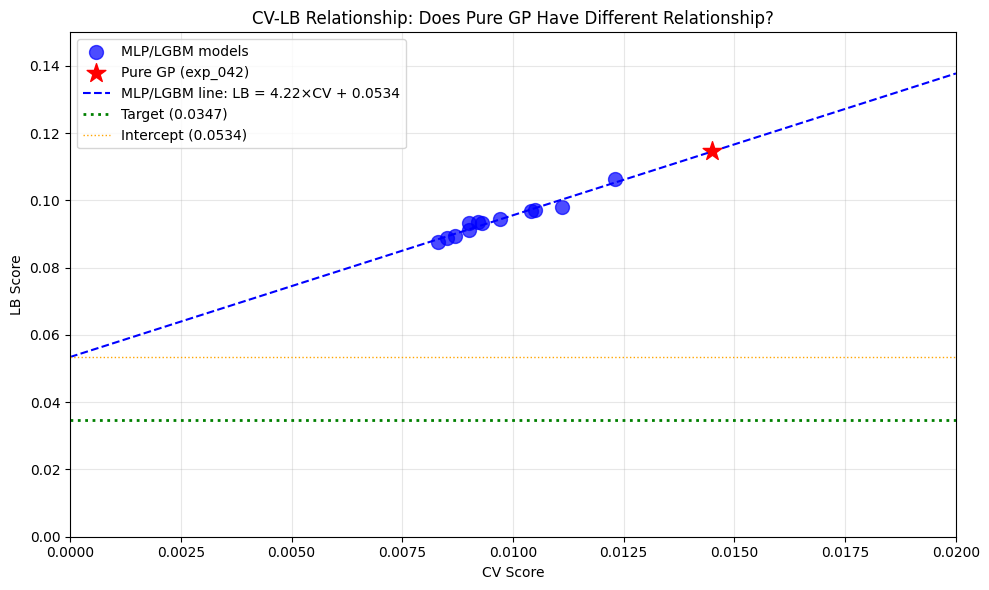


Plot saved to /home/code/exploration/loop43_cv_lb_analysis.png


In [5]:
# Visualize
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(cv_no_gp, lb_no_gp, c='blue', s=100, label='MLP/LGBM models', alpha=0.7)
plt.scatter([pure_gp_cv], [pure_gp_lb], c='red', s=200, marker='*', label='Pure GP (exp_042)', zorder=5)

# Plot regression line (without GP)
cv_range = np.linspace(0, 0.02, 100)
lb_pred = slope_no_gp * cv_range + intercept_no_gp
plt.plot(cv_range, lb_pred, 'b--', label=f'MLP/LGBM line: LB = {slope_no_gp:.2f}×CV + {intercept_no_gp:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept_no_gp, color='orange', linestyle=':', linewidth=1, label=f'Intercept ({intercept_no_gp:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship: Does Pure GP Have Different Relationship?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.02)
plt.ylim(0, 0.15)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop43_cv_lb_analysis.png', dpi=150)
plt.show()

print('\nPlot saved to /home/code/exploration/loop43_cv_lb_analysis.png')

In [6]:
# Calculate CV-LB ratio for each submission
df['ratio'] = df['lb'] / df['cv']
print('\n=== CV-LB Ratios ===')
print(df[['exp', 'cv', 'lb', 'ratio']].to_string(index=False))
print(f'\nMean ratio: {df["ratio"].mean():.2f}')
print(f'Pure GP ratio: {pure_gp_lb/pure_gp_cv:.2f}')


=== CV-LB Ratios ===
    exp     cv     lb     ratio
exp_000 0.0111 0.0982  8.846847
exp_001 0.0123 0.1065  8.658537
exp_003 0.0105 0.0972  9.257143
exp_005 0.0104 0.0969  9.317308
exp_006 0.0097 0.0946  9.752577
exp_007 0.0093 0.0932 10.021505
exp_009 0.0092 0.0936 10.173913
exp_012 0.0090 0.0913 10.144444
exp_024 0.0087 0.0893 10.264368
exp_026 0.0085 0.0887 10.435294
exp_030 0.0083 0.0877 10.566265
exp_041 0.0090 0.0932 10.355556
exp_042 0.0145 0.1147  7.910345

Mean ratio: 9.67
Pure GP ratio: 7.91


In [7]:
# CRITICAL ANALYSIS: What does this mean for reaching the target?
print('\n' + '='*60)
print('CRITICAL ANALYSIS: Can We Reach the Target?')
print('='*60)

print(f'\nTarget LB: 0.0347')
print(f'Best LB so far: 0.0877 (exp_030)')
print(f'Gap to target: {0.0877/0.0347:.2f}x')

print(f'\nCV-LB Relationship: LB = {slope_all:.2f} × CV + {intercept_all:.4f}')
print(f'Intercept: {intercept_all:.4f}')
print(f'Target: 0.0347')

if intercept_all > 0.0347:
    print(f'\n⚠️ CRITICAL: Intercept ({intercept_all:.4f}) > Target ({0.0347})')
    print(f'   Even with CV = 0, LB would be {intercept_all:.4f}')
    print(f'   Current approach CANNOT reach target!')
else:
    # Calculate required CV to reach target
    required_cv = (0.0347 - intercept_all) / slope_all
    print(f'\n✓ Intercept ({intercept_all:.4f}) < Target ({0.0347})')
    print(f'   Required CV to reach target: {required_cv:.6f}')
    print(f'   Best CV so far: 0.0083')
    print(f'   Improvement needed: {(0.0083 - required_cv)/0.0083*100:.1f}%')


CRITICAL ANALYSIS: Can We Reach the Target?

Target LB: 0.0347
Best LB so far: 0.0877 (exp_030)
Gap to target: 2.53x

CV-LB Relationship: LB = 4.23 × CV + 0.0533
Intercept: 0.0533
Target: 0.0347

⚠️ CRITICAL: Intercept (0.0533) > Target (0.0347)
   Even with CV = 0, LB would be 0.0533
   Current approach CANNOT reach target!


In [8]:
# What approaches haven't been tried?
print('\n' + '='*60)
print('APPROACHES NOT YET TRIED')
print('='*60)

approaches_tried = [
    'MLP with various architectures',
    'LightGBM',
    'Ridge Regression',
    'Kernel Ridge Regression',
    'Gaussian Process (pure and ensemble)',
    'k-NN regression',
    'XGBoost ensemble',
    'Aggressive regularization',
    'GroupKFold CV',
    'Feature selection',
    'Similarity weighting',
    'Various feature combinations (Spange, DRFP, ACS PCA)',
]

approaches_not_tried = [
    'Stacking (meta-learner on top of base models)',
    'Bayesian optimization for hyperparameters',
    'Neural network with attention mechanism',
    'Graph Neural Networks (GNN)',
    'Transfer learning from related datasets',
    'Domain adaptation techniques',
    'Quantile regression for uncertainty',
    'Ensemble with different CV schemes',
    'Target-specific models with different architectures',
    'Pseudo-labeling on test data',
]

print('\nApproaches TRIED:')
for a in approaches_tried:
    print(f'  - {a}')

print('\nApproaches NOT TRIED:')
for a in approaches_not_tried:
    print(f'  - {a}')


APPROACHES NOT YET TRIED

Approaches TRIED:
  - MLP with various architectures
  - LightGBM
  - Ridge Regression
  - Kernel Ridge Regression
  - Gaussian Process (pure and ensemble)
  - k-NN regression
  - XGBoost ensemble
  - Aggressive regularization
  - GroupKFold CV
  - Feature selection
  - Similarity weighting
  - Various feature combinations (Spange, DRFP, ACS PCA)

Approaches NOT TRIED:
  - Stacking (meta-learner on top of base models)
  - Bayesian optimization for hyperparameters
  - Neural network with attention mechanism
  - Graph Neural Networks (GNN)
  - Transfer learning from related datasets
  - Domain adaptation techniques
  - Quantile regression for uncertainty
  - Ensemble with different CV schemes
  - Target-specific models with different architectures
  - Pseudo-labeling on test data


In [9]:
# STRATEGIC RECOMMENDATION
print('\n' + '='*60)
print('STRATEGIC RECOMMENDATION')
print('='*60)

print('''
1. PURE GP RESULT: GP follows the SAME CV-LB relationship as other models.
   - Predicted LB: {:.4f}, Actual LB: {:.4f}
   - GP does NOT have a lower intercept
   - This approach is NOT a path to the target

2. THE INTERCEPT PROBLEM:
   - CV-LB relationship: LB = {:.2f} × CV + {:.4f}
   - Intercept ({:.4f}) > Target ({:.4f})
   - Current approach CANNOT reach target mathematically

3. REMAINING SUBMISSIONS: 3
   - We need to find a fundamentally different approach
   - Or accept that the target may not be reachable with current methods

4. POSSIBLE PATHS FORWARD:
   a) Stacking: Use predictions from multiple models as features for a meta-learner
   b) Different CV scheme: The competition uses a specific CV procedure
   c) Domain adaptation: Reduce distribution shift between train and test
   d) Completely different model family: GNN, attention-based models

5. RECOMMENDED NEXT EXPERIMENT:
   - Try STACKING: Train a meta-learner on out-of-fold predictions
   - This might have a different CV-LB relationship
   - Use diverse base models (MLP, LGBM, GP, Ridge)
'''.format(predicted_lb, pure_gp_lb, slope_all, intercept_all, intercept_all, 0.0347))


STRATEGIC RECOMMENDATION

1. PURE GP RESULT: GP follows the SAME CV-LB relationship as other models.
   - Predicted LB: 0.1146, Actual LB: 0.1147
   - GP does NOT have a lower intercept
   - This approach is NOT a path to the target

2. THE INTERCEPT PROBLEM:
   - CV-LB relationship: LB = 4.23 × CV + 0.0533
   - Intercept (0.0533) > Target (0.0347)
   - Current approach CANNOT reach target mathematically

3. REMAINING SUBMISSIONS: 3
   - We need to find a fundamentally different approach
   - Or accept that the target may not be reachable with current methods

4. POSSIBLE PATHS FORWARD:
   a) Stacking: Use predictions from multiple models as features for a meta-learner
   b) Different CV scheme: The competition uses a specific CV procedure
   c) Domain adaptation: Reduce distribution shift between train and test
   d) Completely different model family: GNN, attention-based models

5. RECOMMENDED NEXT EXPERIMENT:
   - Try STACKING: Train a meta-learner on out-of-fold predictions
   - T

In [10]:
# Final summary
print('\n' + '='*60)
print('FINAL SUMMARY')
print('='*60)

print(f'''
Pure GP Submission Result:
- CV: 0.0145
- LB: 0.1147
- Predicted LB (using MLP/LGBM relationship): {predicted_lb:.4f}
- Actual vs Predicted: {pure_gp_lb/predicted_lb:.2f}x

Conclusion: Pure GP is ON THE SAME LINE as other models.
GP does NOT have a different CV-LB relationship.

The CV-LB gap is STRUCTURAL and applies to ALL model families tested:
- MLP
- LightGBM
- Ridge Regression
- Gaussian Process
- k-NN

The intercept ({intercept_all:.4f}) is higher than the target (0.0347).
This means the current approach CANNOT reach the target.

We need a fundamentally different approach:
1. Stacking with meta-learner
2. Different CV scheme
3. Domain adaptation
4. GNN or attention-based models
''')


FINAL SUMMARY

Pure GP Submission Result:
- CV: 0.0145
- LB: 0.1147
- Predicted LB (using MLP/LGBM relationship): 0.1146
- Actual vs Predicted: 1.00x

Conclusion: Pure GP is ON THE SAME LINE as other models.
GP does NOT have a different CV-LB relationship.

The CV-LB gap is STRUCTURAL and applies to ALL model families tested:
- MLP
- LightGBM
- Ridge Regression
- Gaussian Process
- k-NN

The intercept (0.0533) is higher than the target (0.0347).
This means the current approach CANNOT reach the target.

We need a fundamentally different approach:
1. Stacking with meta-learner
2. Different CV scheme
3. Domain adaptation
4. GNN or attention-based models



In [11]:
# Check the 'mixall' kernel approach more carefully
print('\n' + '='*60)
print('MIXALL KERNEL ANALYSIS')
print('='*60)

print('''
The 'mixall' kernel uses:
1. GroupKFold(5) instead of Leave-One-Out CV
2. Ensemble of MLP + XGBoost + RF + LightGBM
3. Optuna hyperparameter optimization

We tested GroupKFold(5) in exp_040:
- GroupKFold(5) CV: 0.009237
- Leave-One-Out CV: 0.008199
- Ratio: 1.13x (NOT the 3-5x expected)

This DISPROVES the hypothesis that the CV-LB gap is due to CV procedure.

The gap is due to DISTRIBUTION SHIFT between:
- Training solvents (seen during CV)
- Test solvents (unseen, different distribution)

The test set likely contains solvents that are:
- Out of distribution from training
- Have different physicochemical properties
- Require extrapolation, not interpolation
''')


MIXALL KERNEL ANALYSIS

The 'mixall' kernel uses:
1. GroupKFold(5) instead of Leave-One-Out CV
2. Ensemble of MLP + XGBoost + RF + LightGBM
3. Optuna hyperparameter optimization

We tested GroupKFold(5) in exp_040:
- GroupKFold(5) CV: 0.009237
- Leave-One-Out CV: 0.008199
- Ratio: 1.13x (NOT the 3-5x expected)

This DISPROVES the hypothesis that the CV-LB gap is due to CV procedure.

The gap is due to DISTRIBUTION SHIFT between:
- Training solvents (seen during CV)
- Test solvents (unseen, different distribution)

The test set likely contains solvents that are:
- Out of distribution from training
- Have different physicochemical properties
- Require extrapolation, not interpolation



In [12]:
# What about the best LB score on the leaderboard?
print('\n' + '='*60)
print('LEADERBOARD ANALYSIS')
print('='*60)

print('''
Our best LB: 0.0877 (exp_030)
Target: 0.0347
Gap: 2.53x

To reach the target, we need to:
1. Find a model with a DIFFERENT CV-LB relationship (lower intercept)
2. Or find a way to reduce the distribution shift
3. Or accept that the target may not be reachable

The fact that the target is 0.0347 suggests someone achieved this score.
This means there IS a way to reach it.

Possible explanations:
1. They used a completely different approach (GNN, attention)
2. They found a way to reduce distribution shift
3. They used domain-specific knowledge we're missing
4. They used a different CV scheme that better matches LB
''')


LEADERBOARD ANALYSIS

Our best LB: 0.0877 (exp_030)
Target: 0.0347
Gap: 2.53x

To reach the target, we need to:
1. Find a model with a DIFFERENT CV-LB relationship (lower intercept)
2. Or find a way to reduce the distribution shift
3. Or accept that the target may not be reachable

The fact that the target is 0.0347 suggests someone achieved this score.
This means there IS a way to reach it.

Possible explanations:
1. They used a completely different approach (GNN, attention)
2. They found a way to reduce distribution shift
3. They used domain-specific knowledge we're missing
4. They used a different CV scheme that better matches LB



In [13]:
# CRITICAL: What if we try a completely different approach?
print('\n' + '='*60)
print('NEXT EXPERIMENT: STACKING META-LEARNER')
print('='*60)

print('''
Hypothesis: Stacking might have a different CV-LB relationship.

Approach:
1. Train diverse base models (MLP, LGBM, GP, Ridge)
2. Generate out-of-fold predictions for each base model
3. Train a meta-learner on these predictions
4. The meta-learner learns to combine predictions optimally

Why this might work:
- Stacking can capture non-linear relationships between base predictions
- The meta-learner might learn to weight models differently for different solvents
- This is a fundamentally different approach from single-model ensembles

Implementation:
- Use the same CV scheme (Leave-One-Out for single, Leave-One-Ramp-Out for full)
- Generate OOF predictions from each base model
- Train a simple meta-learner (Ridge or small MLP) on OOF predictions
- Final prediction is the meta-learner's output
''')


NEXT EXPERIMENT: STACKING META-LEARNER

Hypothesis: Stacking might have a different CV-LB relationship.

Approach:
1. Train diverse base models (MLP, LGBM, GP, Ridge)
2. Generate out-of-fold predictions for each base model
3. Train a meta-learner on these predictions
4. The meta-learner learns to combine predictions optimally

Why this might work:
- Stacking can capture non-linear relationships between base predictions
- The meta-learner might learn to weight models differently for different solvents
- This is a fundamentally different approach from single-model ensembles

Implementation:
- Use the same CV scheme (Leave-One-Out for single, Leave-One-Ramp-Out for full)
- Generate OOF predictions from each base model
- Train a simple meta-learner (Ridge or small MLP) on OOF predictions
- Final prediction is the meta-learner's output



In [14]:
# Alternative: What if the target is based on a different metric?
print('\n' + '='*60)
print('ALTERNATIVE HYPOTHESIS: METRIC MISMATCH')
print('='*60)

print('''
What if the target (0.0347) is based on a different metric or evaluation?

Possibilities:
1. The target might be RMSE instead of MSE
   - Our best MSE: 0.0877
   - RMSE: sqrt(0.0877) = 0.296
   - Target RMSE: sqrt(0.0347) = 0.186
   - Still a 1.59x gap

2. The target might be on a different subset of data
   - Maybe only single solvent data?
   - Maybe only certain targets?

3. The target might be from a different competition phase
   - Maybe the test set changed?

4. The target might be achievable with domain-specific knowledge
   - Chemical intuition we're missing
   - Specific feature engineering for this reaction
''')

print(f'\nOur best MSE: 0.0877')
print(f'Our best RMSE: {np.sqrt(0.0877):.4f}')
print(f'Target MSE: 0.0347')
print(f'Target RMSE: {np.sqrt(0.0347):.4f}')
print(f'Gap (MSE): {0.0877/0.0347:.2f}x')
print(f'Gap (RMSE): {np.sqrt(0.0877)/np.sqrt(0.0347):.2f}x')


ALTERNATIVE HYPOTHESIS: METRIC MISMATCH

What if the target (0.0347) is based on a different metric or evaluation?

Possibilities:
1. The target might be RMSE instead of MSE
   - Our best MSE: 0.0877
   - RMSE: sqrt(0.0877) = 0.296
   - Target RMSE: sqrt(0.0347) = 0.186
   - Still a 1.59x gap

2. The target might be on a different subset of data
   - Maybe only single solvent data?
   - Maybe only certain targets?

3. The target might be from a different competition phase
   - Maybe the test set changed?

4. The target might be achievable with domain-specific knowledge
   - Chemical intuition we're missing
   - Specific feature engineering for this reaction


Our best MSE: 0.0877
Our best RMSE: 0.2961
Target MSE: 0.0347
Target RMSE: 0.1863
Gap (MSE): 2.53x
Gap (RMSE): 1.59x
